<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
MISSING DATA IMPUTATION TECHNIQUES
</h1>
</div>


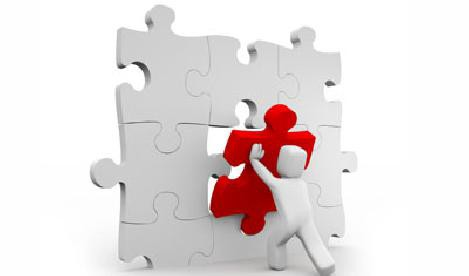

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
FOR NUMERIC VARIABLE</h1>
</div>

<h5>1.MEAN OR MEDIAN IMPUTATION</h5>

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Titanic dataset
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

<p>CRITERIA:<br>
    use when data in normal distribution ,if not data is skewed then median is better<br>
    You can use this method when data is missing completely at random, and no more than 5% of the variable contains missing data<br>
    The higher the percentage of missing values, the higher the distortions(affect the normal distribution)

<h5>2.Arbitrary Value Imputation</h5>

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=999)

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

CRITERIA:<br>
    Data not missing at random<br>
    Distortion of the original variable distribution and variance.<br>
Distortion of the covariance with the remaining dataset variables.<br>
If the arbitrary value is at the end of the distribution, it may mask or create outliers.<br>
We need to be careful not to choose an arbitrary value too similar to the mean or median (or any other typical value of the variable distribution).<br>
The higher the percentage of NA, the higher the distortions.<br>

<h5>3.End of Tail Imputation</h5>

In [ ]:
from feature_engine.missing_data_imputers import EndTailImputer

imputer = EndTailImputer(distribution='gaussian', tail='right')

imputer.fit(train)

train_t = imputer.transform(train)
test_t = imputer.transform(test)

CRITERIA:<br>
    If the variable follows a normal distribution, we can use the mean plus or minus 3 times the standard deviation.<br>
If the variable is skewed, we can use the IQR proximity rule

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
For Category Variable</h1>
</div>

<h5>1.Frequent Category Imputation</h5>

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

CRITERIA:<br>
Data missing at random<br>
It distorts the relation of the most frequent label with other variables within the dataset.<br>
May lead to an over-representation of the most frequent label if there is are a lot of missing observations.<br>
You can use this method when data is missing completely at random, and no more than 5% of the variable contains missing data.

<h5>2.Missing Category Imputation</h5>

create new variable and replace with nan variable

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="Missing")

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

CRITERIA:<br>
If the number of missing values is small, creating an additional category is just adding another rare label to the variable.

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 10px;
              color:white">
NUMERIC AND CATEGORICAL VARIABLE</h1>
</div>

<h5>1.Random Sample Imputation</h5>

In [ ]:
from feature_engine.missing_data_imputers import RandomSampleImputer

imputer = RandomSampleImputer(random_state = 29)

imputer.fit(train)

train_t = imputer.transform(train)
test_t = imputer.transform(test)

CRITERIA:<br>
    The relationship between imputed variables and other variables may be affected if there are a lot of missing values.<br>
Memory is massive for deployment, as we need to store the original training set to extract values from, and replace the missing values with the randomly selected values.

# ADVANCED IMPUTATION

<h5>1.Iterative Imputation</h5>

In [ ]:
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=22)

imputer.fit(train)

train_t = imputer.transform(train)
test_t = imputer.transform(test)

CRITERIA:<br>
    use multivariate variable<br>
    use round-robin<br>

<h6>Using round-robin at each step:<br></h6>
The algorithm chooses a feature as output y and all the other feature columns as inputs X.<br>
Train a regressor and fit it on (X, y) for known y.<br>
The regressor is used to predict the missing values of y<br>.
Repeat until the defined max_iteration is reached.<br>


<h5>2.KNN Imputing</h5>

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

imputer.fit(train)

train_t = imputer.transform(train)
test_t = imputer.transform(test)

CRITERIA:<br>
    This imputation technique uses the famous KNN algorithm to predict the missing values from the neighbors. The idea is simple—any point value is approximated by the nearest point values of other variables.